   A  B  C
0  0  0  0
1  1  1  1
2  2  2  2
3  3  3  3
4  4  4  4
5  5  5  5
6  6  6  6
7  7  7  7
8  8  8  8
9  9  9  9
     A    B    C
0  0.0  0.0  0.0
1  NaN  1.0  1.0
2  2.0  2.0  2.0
3  3.0  3.0  3.0
4  4.0  4.0  4.0
5  5.0  5.0  5.0
6  6.0  6.0  6.0
7  7.0  7.0  NaN
8  8.0  8.0  8.0
9  9.0  NaN  9.0
       A     B     C
0    0.0   0.0   0.0
2    2.0   2.0   2.0
3    3.0   3.0   3.0
4    4.0   4.0   4.0
5    5.0   5.0   5.0
6    6.0   6.0   6.0
8    8.0   8.0   8.0
11  11.0  11.0  11.0
12  12.0  12.0  12.0
13  13.0  13.0  13.0
            A           B           C
0  622.376805  717.031068         NaN
1  627.108253  602.064186         NaN
2  578.289213         NaN  623.981316
3  628.619179  628.428442  634.159737
4  678.549429         NaN  635.686793
5  620.213579  638.963031  664.604540
6         NaN  629.441103  620.257476
7  619.358227         NaN  639.183481
8  618.699292         NaN         NaN
9  693.023748  640.623252  526.391062
            A           B           C
0  62

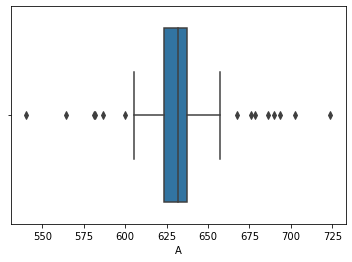

     brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0
     brand style  rating
0  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0
     brand style  rating
0  Yum Yum   cup     4.0
2  Indomie   cup     3.5


In [39]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


def main():
    task_1()
    task_3()
    task_4()
    task_5()


def task_1():
    df = pd.DataFrame({'A': list(range(100)), 'B': list(range(100)), 'C': list(range(100))})
    # before adding nan
    print(df.head(10))

    nan_percent = {'A': 0.10, 'B': 0.15, 'C': 0.08}

    for col in df:
        for i, row_value in df[col].iteritems():
            if random.random() <= nan_percent[col]:
                df[col][i] = np.nan
    # after adding nan
    print(df.head(10))
    # with dropped nan rows
    print(df.dropna(how='any').head(10))


def task_3():
    df = pd.DataFrame({
        'A': generate(),
        'B': generate(),
        'C': generate()
    })
    nan_percent = {'A': 0.15, 'B': 0.15, 'C': 0.15}
    for col in df:
        for i, row_value in df[col].iteritems():
            if random.random() <= nan_percent[col]:
                df[col][i] = np.nan
    print(df.head(10))
    print(df.fillna(df.mean()).head(10))


def task_4():
    data = pd.DataFrame({
        'A': generate(),
        'B': generate(),
        'C': generate()
    })
    # find absolute value of z-score for each observation
    z = np.abs(stats.zscore(data))

    # only keep rows in dataframe with all z-scores less than absolute value of 2
    data_clean = data[(z < 2).all(axis=1)]
    print(data.shape)
    # shape of data was changed
    print(data_clean.shape)
    sns.boxplot(data['A'])
    plt.show()
#     https://www.statology.org/remove-outliers-python/


def task_5():
    df = pd.DataFrame({
        'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
        'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
        'rating': [4, 4, 3.5, 15, 5]
    })
    print(df)
    print(df.drop_duplicates())
    print(df.drop_duplicates(subset=['brand']))


def generate(median=630, err=12, outlier_err=100, size=80, outlier_size=10):
    errs = err * np.random.rand(size) * np.random.choice((-1, 1), size)
    data = median + errs

    lower_errs = outlier_err * np.random.rand(outlier_size)
    lower_outliers = median - err - lower_errs

    upper_errs = outlier_err * np.random.rand(outlier_size)
    upper_outliers = median + err + upper_errs

    data = np.concatenate((data, lower_outliers, upper_outliers))
    np.random.shuffle(data)

    return data


if __name__ == '__main__':
    main()
